# Dataset normalization

This code can be run sequentially to normalize the table at **filename**

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
filename = 'data/batting.csv'

### Initial table

In [222]:
batting_df = pd.read_csv(filename)
display(batting_df)
# batting_df[batting_df['player_id'] == 'acostme01']

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101327,zitoba01,2015,1,OAK,AL,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101328,zobribe01,2015,1,OAK,AL,67,235.0,39.0,63.0,20.0,...,33.0,1.0,1.0,33.0,26.0,2.0,0.0,0.0,3.0,5.0
101329,zobribe01,2015,2,KCA,AL,59,232.0,37.0,66.0,16.0,...,23.0,2.0,3.0,29.0,30.0,1.0,1.0,0.0,2.0,3.0
101330,zuninmi01,2015,1,SEA,AL,112,350.0,28.0,61.0,11.0,...,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


In [225]:
# Combine same-year stats
batting_df = batting_df.groupby(['player_id', 'year']).sum(min_count=1)
batting_df.reset_index(inplace=True)
batting_df = batting_df.sort_values(['year', 'player_id'])

# Remove NaNs 

In [226]:
batting_df

,player_id,year,stint,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
142,abercda01,1871,1,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
501,addybo01,1871,1,25,118.0,30.0,32.0,6.0,0.0,0.0,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
1103,allisar01,1871,1,29,137.0,28.0,40.0,4.0,5.0,0.0,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
1123,allisdo01,1871,1,27,133.0,28.0,44.0,10.0,2.0,2.0,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
1932,ansonca01,1871,1,25,120.0,29.0,39.0,11.0,3.0,0.0,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93766,zimmery01,2015,1,95,346.0,43.0,86.0,25.0,1.0,16.0,73.0,1.0,0.0,33.0,79.0,0.0,1.0,0.0,10.0,13.0
93812,zitoba01,2015,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93830,zobribe01,2015,3,126,467.0,76.0,129.0,36.0,3.0,13.0,56.0,3.0,4.0,62.0,56.0,3.0,1.0,0.0,5.0,8.0
93868,zuninmi01,2015,1,112,350.0,28.0,61.0,11.0,0.0,11.0,28.0,0.0,1.0,21.0,132.0,0.0,5.0,8.0,2.0,6.0


In [227]:
# Explore NaNs

In [228]:
# How many NaNs per column per year? does it change over time?

# Preprocessing steps:
#     -Drop all players who started playing before 1913 (when strikeouts started being recorded)
#     -Drop all with ab==NaN; eliminates spike in late 1970s
#
#     -When normalizing over each year, compare to *all* players from 1913, not just the new ones

In [229]:
# if AB is nan, all other stats are also nan; these players should be dropped
players_with_nans = batting_df[batting_df['year'] == 1973][batting_df['ab'].isnull()]['player_id'].values
players_with_nans

<ipython-input-229-a71b99271f4b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  players_with_nans = batting_df[batting_df['year'] == 1973][batting_df['ab'].isnull()]['player_id'].values


array(['abbotgl01', 'alburvi01', 'alexado01', 'allenll01', 'baldwda01',
       'baneed01', 'barbest01', 'beenefr01', 'bellje01', 'blylebe01',
       'bolinbo01', 'bosmadi01', 'brownja01', 'burgmto01', 'busketo01',
       'campbbi02', 'clydeda01', 'colboji01', 'colemjo05', 'corbira01',
       'coxca01', 'cuellmi01', 'culpra01', 'curtijo01', 'deckejo01',
       'dobsoch01', 'farmeed01', 'fifeda01', 'fitzmal01', 'frailke01',
       'frymawo01', 'gardnro01', 'garlawa01', 'garmami01', 'geddeji01',
       'goltzda01', 'hamilda01', 'handri01', 'handsbi01', 'hasslan01',
       'henniri01', 'hilgeto01', 'hillejo01', 'holdsfr01', 'hooddo01',
       'hudsoch01', 'ignasga01', 'jacksgr01', 'jacksmi01', 'jeffeje01',
       'johnsba01', 'johnsje01', 'kealest01', 'kilkemi01', 'klinest01',
       'kobelke01', 'kremmji01', 'lagrole01', 'lambra01', 'langedi01',
       'lemanda01', 'lindbpa01', 'littema01', 'lockwsk01', 'lolicmi01',
       'lylesp01', 'magnuji01', 'mcgloly01', 'mcnalda01', 'medicdo01',
  

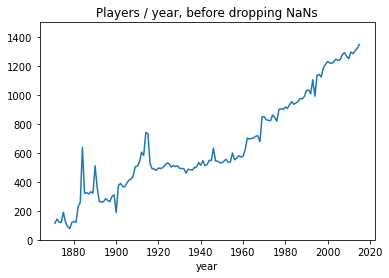

In [230]:
# num samples / year
batting_df.groupby('year')['player_id'].agg('count').plot(title='Players / year, before dropping NaNs', ylim=(0, 1500))

In [231]:
# Where columns are missing:

#    SH before 1895
#    HBP before 1887
#    RBI 1882, 1884
#    SB 1876-85
#    SO 1882-1912

#    Drop below columns - less important stats
#    CS 1876-1950
#    SF -1954    
#    G_IDP -1939 
#    IBB -1955

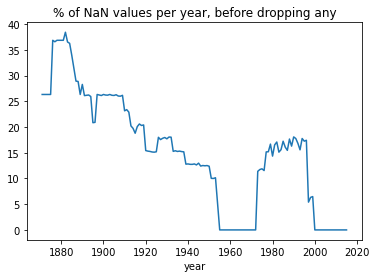

In [232]:
# % NaN per column per year
year_stat_nan_df = batting_df.groupby('year').agg(lambda X: X.isna().sum() / len(X) * 100)
year_stat_nan_df.mean(axis=1).plot(title='% of NaN values per year, before dropping any')

In [240]:
# Drop where ab is NaN; gets rid of late 1900s spike
batting_df_no_late_spike = batting_df[batting_df['ab'].notna()]

# Drop players who started before 1913
player_first_years_df = batting_df_no_late_spike.groupby('player_id')['year'].min()
played_after_1913 = player_first_years_df[batting_no_nan_df['player_id']] >= 1913
batting_no_nan_df = batting_no_nan_df[played_after_1913.values]

# get indexes of samples corresponding to players who started after 1913
valid_sample_idxs = batting_no_nan_df.index
valid_sample_idxs

Int64Index([  293,   579,  1136,  2815,  4278,  4354,  4648,  4945,  5736,
             5904,
            ...
            93196, 93250, 93302, 93679, 93754, 93766, 93812, 93830, 93868,
            93897],
           dtype='int64', length=74090)

Text(0, 0.5, '# of players')

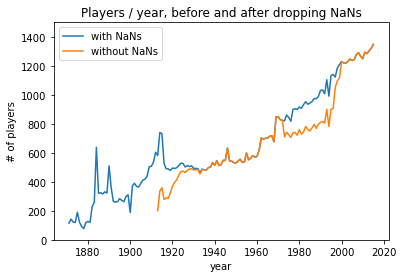

In [241]:
batting_df.groupby('year')['player_id'].agg('count').plot(title='Players / year, before and after dropping NaNs', ylim=(0, 1500))
batting_no_nan_df.groupby('year')['player_id'].agg('count').plot(title='Players / year, before and after dropping NaNs', ylim=(0, 1500))
plt.legend(['with NaNs', 'without NaNs'])
plt.ylabel('# of players')


# Normalization

In [259]:
# Select useful columns
batting_df_good_stats = batting_df[['player_id', 'year', 'g', 'ab', 'r', 'h', 'double', 'triple', 'hr', 'rbi', 'sb', 'bb', 'so', 'hbp', 'sh']][batting_df['year'] >= 1913]

batting_df_good_stats[batting_df_good_stats['year'] == 2015].mean()

year      2015.000000
g           52.324926
ab         122.765579
r           15.316766
h           31.235905
double       6.114243
triple       0.696588
hr           3.641691
rbi         14.577151
sb           1.858309
bb          10.439911
so          27.778932
hbp          1.188427
sh           0.890208
dtype: float64

In [260]:
batting_df_good_stats

,player_id,year,g,ab,r,h,double,triple,hr,rbi,sb,bb,so,hbp,sh
293,acostme01,1913,12,20.0,3.0,6.0,0.0,1.0,0.0,1.0,2.0,4.0,2.0,0.0,0.0
332,adamsba01,1913,43,114.0,13.0,33.0,6.0,2.0,0.0,13.0,0.0,1.0,16.0,0.0,3.0
464,adamswi01,1913,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
579,agnewsa01,1913,105,307.0,27.0,64.0,9.0,5.0,2.0,24.0,11.0,20.0,49.0,7.0,10.0
665,ainsmed01,1913,84,229.0,26.0,49.0,4.0,4.0,2.0,20.0,17.0,12.0,41.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93766,zimmery01,2015,95,346.0,43.0,86.0,25.0,1.0,16.0,73.0,1.0,33.0,79.0,1.0,0.0
93812,zitoba01,2015,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93830,zobribe01,2015,126,467.0,76.0,129.0,36.0,3.0,13.0,56.0,3.0,62.0,56.0,1.0,0.0
93868,zuninmi01,2015,112,350.0,28.0,61.0,11.0,0.0,11.0,28.0,0.0,21.0,132.0,5.0,8.0


In [262]:
# normalize per year
yearly_means = batting_df_good_stats.groupby('year').mean()
yearly_stds = batting_df_good_stats.groupby('year').std()
yearly_means
yearly_stds

,g,ab,r,h,double,triple,hr,rbi,sb,bb,so,hbp,sh
year,,,,,,,,,,,,,
1913,48.931390,180.696264,26.166504,51.575902,8.230753,3.787861,2.079507,21.883194,10.673965,19.336560,17.562652,2.237706,6.564790
1914,50.748947,189.410518,26.495014,53.186675,8.795585,3.707935,2.257684,23.027863,10.591128,20.763065,19.842018,2.284816,7.447442
1915,51.318735,190.836722,26.316340,52.792575,8.563289,3.947703,2.052220,22.472195,9.729236,21.266257,18.761488,2.447679,8.029188
1916,49.947296,185.893713,24.229837,51.174861,8.443964,3.596745,1.803383,20.503677,9.205675,19.541948,18.154367,2.215041,7.608104
1917,50.511549,190.373208,24.818256,52.918738,8.339798,3.707907,1.576910,21.167438,8.530015,19.025271,16.950910,2.130139,8.574415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,45.970954,184.011026,25.798500,50.356786,10.373306,1.680715,7.077265,25.478604,6.482077,19.477439,37.558499,2.484449,2.581760
2012,46.250149,185.426368,26.230657,50.720350,10.421042,1.678747,7.521039,25.900490,6.375904,18.916695,40.260483,2.421914,2.287481
2013,46.415317,185.457871,24.988755,50.352730,10.311441,1.407402,6.862580,24.689770,5.771384,18.944375,40.097214,2.486298,2.182434


In [263]:
batting_df_norm_year = batting_df_good_stats.apply(lambda row: (row - yearly_means.loc[row['year']]) / yearly_stds.loc[row['year']], axis=1)

In [264]:
batting_df_norm_year

,ab,bb,double,g,h,hbp,hr,player_id,r,rbi,sb,sh,so,triple,year
293,-0.661588,-0.438871,-0.640879,-0.705525,-0.583966,-0.539028,-0.388342,NaN,-0.539369,-0.609924,-0.335788,-0.665060,-0.794309,-0.310270,NaN
332,-0.141378,-0.594017,0.088095,-0.071985,-0.060465,-0.539028,-0.388342,NaN,-0.157201,-0.061558,-0.523160,-0.208077,0.002837,-0.046268,NaN
464,-0.766736,-0.594017,-0.640879,-0.869020,-0.700299,-0.539028,-0.388342,NaN,-0.654019,-0.655621,-0.523160,-0.665060,-0.851248,-0.574271,NaN
579,0.926713,0.388577,0.452581,1.195095,0.540591,2.589176,0.573424,NaN,0.377834,0.441111,0.507385,0.858218,1.881824,0.745736,NaN
665,0.495050,-0.025147,-0.154896,0.765923,0.249757,0.801631,0.573424,NaN,0.339617,0.258322,1.069500,-0.360404,1.426312,0.481734,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93766,1.208874,1.226251,1.871328,0.913961,1.092331,-0.071749,1.704254,NaN,1.094067,2.355234,-0.165343,-0.478008,1.268909,0.186402,NaN
93812,-0.664808,-0.567460,-0.605841,-1.056380,-0.623035,-0.452528,-0.502202,NaN,-0.605333,-0.587657,-0.357982,-0.478008,-0.688173,-0.427949,NaN
93830,1.864121,2.802542,2.961283,1.577881,1.950014,-0.071749,1.290544,NaN,2.398257,1.669903,0.219934,-0.478008,0.699126,1.415103,NaN
93868,1.230535,0.573992,0.484114,1.278046,0.593678,1.451366,1.014737,NaN,0.501253,0.541123,-0.357982,3.817692,2.581888,-0.427949,NaN


In [265]:
# Add year and player id columns back in
batting_df_norm_year['year'] = batting_df_good_stats['year']
batting_df_norm_year['player_id'] = batting_df_good_stats['player_id']

# verify mean and std are (0, 1)
display(batting_df_norm_year.groupby('year').mean())
batting_df_norm_year.groupby('year').std()

,ab,bb,double,g,h,hbp,hr,r,rbi,sb,sh,so,triple
year,,,,,,,,,,,,,
1913,8.327567e-17,3.309685e-17,4.168105e-17,2.828017e-17,5.212516e-17,-2.718330e-17,1.244947e-16,2.045901e-17,-3.003277e-17,1.105931e-16,6.845898e-17,-1.955290e-17,7.195228e-17
1914,2.580518e-17,-6.091224e-17,-4.920989e-17,1.020205e-16,-2.940591e-17,9.658190e-17,1.824366e-16,-2.760555e-17,9.061820e-17,-1.329267e-16,-6.961398e-17,3.900784e-17,-1.509303e-16
1915,-6.240271e-17,-4.301546e-17,-1.211703e-18,3.332184e-17,5.089153e-17,1.693355e-16,-5.452664e-17,9.148359e-17,-9.572455e-17,-6.452319e-17,2.514284e-17,-1.126884e-16,-1.026918e-16
1916,3.307496e-17,-4.076436e-17,1.710628e-16,1.155517e-16,-7.794735e-18,-4.213370e-17,2.302607e-16,5.245646e-17,2.054018e-16,-3.539231e-17,6.499123e-17,1.931830e-16,2.418474e-16
1917,-6.344132e-17,7.091833e-17,-8.156741e-17,-5.120620e-17,-5.437827e-18,1.469913e-17,0.000000e+00,2.628283e-17,-1.812609e-17,9.063045e-19,2.673598e-17,-5.256566e-17,-1.495402e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2.400482e-17,-1.721489e-16,-1.652903e-16,-4.423746e-17,3.223505e-17,-2.604523e-16,1.594606e-16,6.172669e-17,9.224710e-17,4.934706e-16,2.582233e-16,-8.573151e-18,8.950369e-17
2012,4.392471e-17,2.075183e-17,-2.421047e-18,-3.493225e-17,-5.187958e-18,2.034544e-16,-1.449170e-16,1.379997e-16,3.666157e-17,1.430147e-16,5.317657e-17,-8.248853e-17,-8.300733e-17
2013,2.622306e-17,7.581699e-17,-1.953958e-17,-2.921626e-17,1.360108e-17,1.357128e-16,3.839805e-17,-5.278668e-18,7.362464e-17,3.193168e-16,-5.329752e-17,-2.605278e-17,-3.206365e-16


,ab,bb,double,g,h,hbp,hr,r,rbi,sb,sh,so,triple
year,,,,,,,,,,,,,
1913,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1914,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1915,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1916,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1917,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2012,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2013,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [266]:
# Sanity check normalization: Babe Ruth (ruthba01) should have the best year in terms of home runs
batting_df_norm_year.iloc[batting_df_norm_year['hr'].argmax()]

ab            1.42418
bb            6.94173
double        2.72395
g             1.72638
h             2.04073
hbp          0.876766
hr            14.7881
player_id    ruthba01
r             4.51326
rbi           4.40007
sb            1.52793
sh          -0.133413
so            4.19702
triple        1.58117
year             1920
Name: 73855, dtype: object

### Verify yearly and overall means are 0 and SDs are 1

In [268]:
# mean = 0, std = 1 per year
display(batting_df_norm_year.groupby('year').mean())
display(batting_df_norm_year.groupby('year').std())

# mean = 0, std = 1 per column
display(batting_df_norm_year.mean(axis=0))
display(batting_df_norm_year.std(axis=0))

,ab,bb,double,g,h,hbp,hr,r,rbi,sb,sh,so,triple
year,,,,,,,,,,,,,
1913,8.327567e-17,3.309685e-17,4.168105e-17,2.828017e-17,5.212516e-17,-2.718330e-17,1.244947e-16,2.045901e-17,-3.003277e-17,1.105931e-16,6.845898e-17,-1.955290e-17,7.195228e-17
1914,2.580518e-17,-6.091224e-17,-4.920989e-17,1.020205e-16,-2.940591e-17,9.658190e-17,1.824366e-16,-2.760555e-17,9.061820e-17,-1.329267e-16,-6.961398e-17,3.900784e-17,-1.509303e-16
1915,-6.240271e-17,-4.301546e-17,-1.211703e-18,3.332184e-17,5.089153e-17,1.693355e-16,-5.452664e-17,9.148359e-17,-9.572455e-17,-6.452319e-17,2.514284e-17,-1.126884e-16,-1.026918e-16
1916,3.307496e-17,-4.076436e-17,1.710628e-16,1.155517e-16,-7.794735e-18,-4.213370e-17,2.302607e-16,5.245646e-17,2.054018e-16,-3.539231e-17,6.499123e-17,1.931830e-16,2.418474e-16
1917,-6.344132e-17,7.091833e-17,-8.156741e-17,-5.120620e-17,-5.437827e-18,1.469913e-17,0.000000e+00,2.628283e-17,-1.812609e-17,9.063045e-19,2.673598e-17,-5.256566e-17,-1.495402e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,2.400482e-17,-1.721489e-16,-1.652903e-16,-4.423746e-17,3.223505e-17,-2.604523e-16,1.594606e-16,6.172669e-17,9.224710e-17,4.934706e-16,2.582233e-16,-8.573151e-18,8.950369e-17
2012,4.392471e-17,2.075183e-17,-2.421047e-18,-3.493225e-17,-5.187958e-18,2.034544e-16,-1.449170e-16,1.379997e-16,3.666157e-17,1.430147e-16,5.317657e-17,-8.248853e-17,-8.300733e-17
2013,2.622306e-17,7.581699e-17,-1.953958e-17,-2.921626e-17,1.360108e-17,1.357128e-16,3.839805e-17,-5.278668e-18,7.362464e-17,3.193168e-16,-5.329752e-17,-2.605278e-17,-3.206365e-16


,ab,bb,double,g,h,hbp,hr,r,rbi,sb,sh,so,triple
year,,,,,,,,,,,,,
1913,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1914,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1915,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1916,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1917,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2012,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2013,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


ab        2.643836e-18
bb        9.266458e-20
double   -3.227334e-18
g         3.124232e-18
h         1.488425e-17
hbp      -2.806144e-17
hr        2.422744e-17
r         2.863191e-17
rbi       3.535733e-18
sb       -5.365858e-18
sh       -1.011347e-17
so        3.351852e-18
triple   -1.814778e-17
year      1.973989e+03
dtype: float64

ab         0.999335
bb         0.999335
double     0.999335
g          0.999372
h          0.999335
hbp        0.999335
hr         0.999335
r          0.999335
rbi        0.999335
sb         0.999335
sh         0.999335
so         0.999335
triple     0.999335
year      29.517969
dtype: float64

# Save data to file

In [269]:
batting_df_norm_year.to_csv('data/batting_norm.csv')
np.save('valid_sample_idxs.npy', valid_sample_idxs)
np.save('data/players_with_nans.npy', players_with_nans)

# Remove players starting before 1913, or with a missing row in late 1900s

(These players are necessary to normalize accurately, but can't be used as samples for model training)

In [ ]:
batting_df_norm_final = pd.read_csv('data/batting_norm.csv', index_col=0)
players_with_nans

batting_df_norm_final = batting_df_norm_final.loc[valid_sample_idxs]
batting_df_norm_final = batting_df_norm_final[~batting_df_norm_final['player_id'].isin(players_with_nans)]
batting_df_norm_final
batting_df_norm_final.to_csv('data/batting_norm.csv')

In [274]:
batting_df_norm_final[batting_df_norm_final['player_id'] == 'acostme01']

,ab,bb,double,g,h,hbp,hr,player_id,r,rbi,sb,sh,so,triple,year
293,-0.661588,-0.438871,-0.640879,-0.705525,-0.583966,-0.539028,-0.388342,acostme01,-0.539369,-0.609924,-0.335788,-0.665060,-0.794309,-0.310270,1913
294,-0.483912,-0.195448,-0.483197,-0.320949,-0.433684,-0.586126,-0.424975,acostme01,-0.363658,-0.543642,-0.300226,-0.759920,-0.097868,-0.094392,1914
295,-0.015906,0.603278,-0.254903,0.332964,-0.143112,1.068473,-0.422130,acostme01,0.023173,0.073640,0.246511,0.366331,-0.219965,-0.358023,1915
296,-0.793204,-0.584739,-0.673038,-0.953833,-0.732615,-0.548261,-0.402995,acostme01,-0.696132,-0.695761,-0.567466,-0.705579,-0.996514,-0.601957,1916
297,0.209949,0.386590,-0.262464,0.209162,0.362133,-0.543846,-0.373000,acostme01,0.385707,0.074912,-0.009334,0.737089,-0.093480,0.411652,1918


In [271]:
pd.read_csv('data/batting_norm.csv', index_col=0)['player_id'].unique().size

14282

In [272]:
pd.read_csv('data/batting_norm.csv', index_col=0).groupby('player_id')['year'].count().mean()

5.1436773561125895